In [98]:
import psycopg2
import psycopg2.extras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from faker import Faker
import random
from datetime import datetime, timedelta

In [3]:
pip install faker


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Connecting


In [95]:
#creating a class so we can use objects
class PostgresConnection(object):
    #right after calling this class __init__() function will execute first
    def __init__(self):
        self.connection = psycopg2.connect(database = "mdb",
                                           user = "postgres",
                                           password = "1234",
                                           host = "127.0.0.1",
                                           port = "5432")
        print("\nConnected!")
    #getConnection() function will call __init__() and connect
    def getConnection(self):
            print("Connection to DB established")
            return self.connection

In [219]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


#### Inserting Data to User Table

In [112]:
bd_street = [
    "Dhanmondi Road",
    "Motijheel Avenue",
    "Gulshan Avenue",
    "Farmgate Road",
    "Puran Dhaka Lane",
    "Mirpur Road",
    "Banani Street",
    "Mohakhali Boulevard",
    "Shantinagar Road",
    "Uttara Expressway",
    "Jatrabari Lane",
    "Moghbazar Street",
    "Tejgaon Industrial Area",
    "Baily Road",
    "Shyamoli Avenue",
    "New Elephant Road",
    "Lalmatia Street",
    "Badda Road",
    "Maghbazar Avenue",
    "Gopibag Lane",
    "Malibagh Road",
    "Khilgaon Lane",
    "Bashundhara R/A Street",
    "Kakrail Road",
    "Gazipur Bypass",
    "Siddikbazar Lane",
    "Mirpur DOHS Road",
    "Basabo Avenue",
    "Azimpur Road",
    "Niketon Street"
]

bd_thana = [
    "Dhanmondi",
    "Motijheel",
    "Gulshan",
    "Farmgate",
    "Puran Dhaka",
    "Mirpur",
    "Banani",
    "Mohakhali",
    "Shantinagar",
    "Uttara",
    "Jatrabari",
    "Moghbazar",
    "Tejgaon",
    "Baily Road",
    "Shyamoli",
    "New Elephant Road",
    "Lalmatia",
    "Badda",
    "Maghbazar",
    "Gopibag",
    "Malibagh",
    "Khilgaon",
    "Bashundhara R/A",
    "Kakrail",
    "Gazipur",
    "Siddikbazar",
    "Mirpur DOHS",
    "Basabo",
    "Azimpur",
    "Niketon"
]

bd_district = [
    "Dhaka",
    "Chittagong",
    "Khulna",
    "Sylhet",
    "Barisal",
    "Rajshahi",
    "Mymensingh",
    "Comilla",
    "Narayanganj",
    "Gazipur",
    "Jhenaidah",
    "Munshiganj",
    "Jessore",
    "Bogra",
    "Tangail",
    "Kushtia",
    "Rangpur",
    "Faridpur",
    "Narsingdi",
    "Dinajpur",
    "Pabna",
    "Noakhali",
    "Feni",
    "Bhola",
    "Cox's Bazar",
    "Madaripur",
    "Lakshmipur",
    "Sunamganj",
    "Habiganj",
    "Meherpur"
]

bd_cities = [
    "Dhaka",
    "Chittagong",
    "Khulna",
    "Sylhet",
    "Barisal",
    "Rajshahi",
    "Mymensingh",
    "Comilla",
    "Narayanganj",
    "Gazipur",
    "Jhenaidah",
    "Munshiganj",
    "Jessore",
    "Bogra",
    "Tangail",
    "Kushtia",
    "Rangpur",
    "Faridpur",
    "Narsingdi",
    "Dinajpur",
    "Pabna",
    "Noakhali",
    "Feni",
    "Bhola",
    "Cox's Bazar",
    "Madaripur",
    "Lakshmipur",
    "Sunamganj",
    "Habiganj",
    "Meherpur"
]

bd_divisions = [
    "Dhaka",
    "Chittagong",
    "Khulna",
    "Sylhet",
    "Barisal",
    "Rajshahi",
    "Mymensingh"
]
mobile_operators = ["Grameenphone", "Robi", "Banglalink", "Teletalk", "Airtel", "Citycell"]
fake = Faker()

# Function to generate a random user ID
def generate_random_user_id():
    # You can adjust the range and format of the user ID as needed
    user_id = random.randint(1000, 9999)  # Generates a random 4-digit user ID
    return user_id

def generate_bangladeshi_mobile_number():
    operator_prefix = random.choice(operator_prefixes)
    random_number = "".join([str(random.randint(0, 9)) for _ in range(8)])  # Generates an 8-digit random number
    return operator_prefix + random_number

# Create a cursor to execute SQL queries
cur = con.cursor()

for operator_name in mobile_operators:
    for _ in range(10):
        u_id = generate_random_user_id()
        name = fake.name()
        nid = fake.unique.random_number(11)
        mobile = generate_bangladeshi_mobile_number()
        house = fake.building_number()
        street = random.choice(bd_street)
        thana = random.choice(bd_thana)
        city = random.choice(bd_cities)
        district = random.choice(bd_district)
        division = random.choice(bd_divisions)
        age = random.randint(18, 70)
        op_id = random.randint(1, 5) 
        # Insert user data with the associated operator name
        cur.execute(
            "INSERT INTO mschema.user (u_id, name, nid, mobile, house, street, thana, city, district, division, age, op_id) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
            (u_id, name, nid, mobile, house, street, thana, city, district, division, age, op_id))

# Commit the changes to the database
con.commit()

#### Fetching Data from DB

In [213]:
cur = con.cursor()
stmt = """
        select u_id
        from mschema.user
        order by u_id asc
"""
cur.execute(stmt)
user_id = cur.fetchall()

In [214]:
cur = con.cursor()
stmt = """
        select mobile
        from mschema.user
        order by u_id asc
"""
cur.execute(stmt)
u_mobile = cur.fetchall()

In [216]:
# Assuming you have fetched data from the database as shown
cur = con.cursor()
stmt = """
        select u_id, mobile
        from mschema.user
        order by u_id asc
"""
cur.execute(stmt)
data = cur.fetchall()

df = pd.DataFrame(list(data), columns = ['user_id', 'mobile'])


In [235]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


#### Inserting Data to Call_details Table

In [233]:
def generate_random_date():
    today = datetime.now()
    five_years_ago = today - timedelta(days=365 * 5)
    random_days = random.randint(0, (today - five_years_ago).days)
    random_date = five_years_ago + timedelta(days=random_days)
    return random_date

def generate_random_quarter():
    return random.randint(1, 4)

# Function to generate a random month within the given quarter
def generate_random_month(quarter):
    if quarter == 1:
        return random.choice(["January", "February", "March"])
    elif quarter == 2:
        return random.choice(["April", "May", "June"])
    elif quarter == 3:
        return random.choice(["July", "August", "September"])
    else:
        return random.choice(["October", "November", "December"])

# Function to generate a random call time duration in hh:mm:ss format
def generate_random_duration():
    # Define a weighted probability distribution for hours
    hour_choices = [0] * 10 + [1] * 3  # More chances of 0 hours

    hours = random.choice(hour_choices)  # Randomly select 0 or 1 hour
    minutes = random.randint(0, 59)  # Random minutes (0-59)
    seconds = random.randint(0, 59)  # Random seconds (0-59)

    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"


# Create a cursor to execute SQL queries
cur = con.cursor()
fake = Faker()

# Start date: January 1, 2018
start_date = datetime(2018, 1, 1)
# End date: Today's date
end_date = datetime.now()
for u_id in user_id:
    current_date = start_date
    while current_date <= end_date:
        num_iterations = random.randint(10, 30)
        for _ in range(num_iterations):
            is_caller = random.choice([True, False])
            if is_caller:
                caller_mob = df.sample()['mobile'].values[0]
                called_mob = random.choice(u_mobile)
            else:
                caller_mob = random.choice(u_mobile)
                called_mob = df.sample()['mobile'].values[0]
            date = generate_random_date().strftime('%Y-%m-%d')
            day_of_week = fake.day_of_week()
            week_of_month = random.randint(1,4)
            quarter_of_year = generate_random_quarter()
            quarter_of_month = generate_random_month(quarter_of_year)
            month = quarter_of_month
            year = int(date[:4])
            duration = generate_random_duration()
            cost = random.randint(1, 100)  # Adjust the range based on your data
            u_id = random.choice(user_id) 
            # Insert user data with the associated operator name
            cur.execute(
                "INSERT INTO mschema.call_details (caller_mob, called_mob, date, day_of_week, week_of_month, quarter_of_month, quarter_of_year, month, year, duration, cost, u_id) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
                (caller_mob, called_mob, date, day_of_week, week_of_month, quarter_of_month, quarter_of_year, month, year, duration, cost, u_id))
             # Increment the date for the next day
            current_date += timedelta(days=1)

# Commit the changes to the database
con.commit()

#### Analytics


In [274]:
#con object to initiate the connection
con = PostgresConnection().getConnection()


Connected!
Connection to DB established


#### Avg call costs per year 

In [258]:
# Assuming you have fetched data from the database as shown
cur = con.cursor()
stmt = """
        select o.op_name, c.year, avg(c.cost)
        from mschema.call_details c
        join mschema.user u on u.u_id = c.u_id
        join mschema.operator o on o.op_id = u.op_id
        group by cube (o.op_name, c.year)
        order by o.op_name
"""
cur.execute(stmt)
data = cur.fetchall()

df = pd.DataFrame(list(data), columns = ['Op_name', 'Year', 'Avg_Cost'])
df = df.dropna()

In [259]:
df

,Op_name,Year,Avg_Cost
0,Airtel,2018,52.5280777537796976
1,Airtel,2023,50.2706822829522216
2,Airtel,2019,50.7769784172661871
3,Airtel,2022,50.5258074730842305
4,Airtel,2021,50.6311615611879956
6,Airtel,2020,50.5981920199501247
7,Banglalink,2018,51.9907550077041602
9,Banglalink,2021,50.8183429330970315
10,Banglalink,2019,51.4508292455033871
11,Banglalink,2020,50.1940543071161049


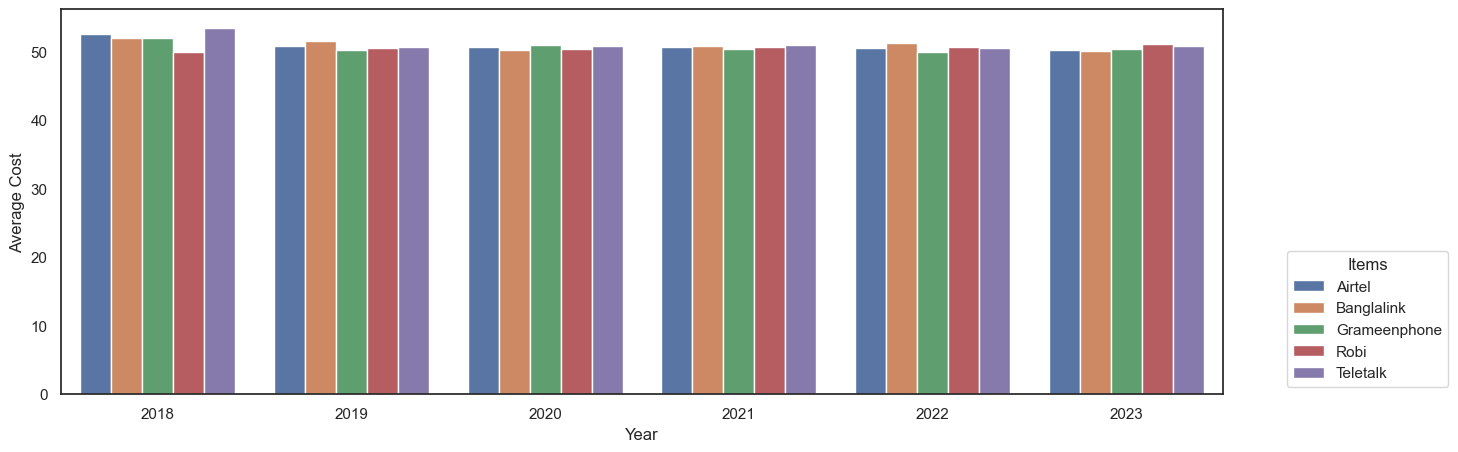

In [268]:
plt.figure(figsize=[15,5])
sns.set(style='white')
sns.barplot(x = df['Year'], y = df['Avg_Cost'], hue = df['Op_name'], legend=True)

#Labelling the axes
plt.xlabel('Year')
plt.ylabel('Average Cost')
legend = plt.legend(title='Items', loc='lower right', bbox_to_anchor=(1.2, 0))

#### Number of calls made on September, 2019

In [277]:
cur = con.cursor()
stmt = """
        select o.op_name, c.month, c.year, count(c.u_id)
        from mschema.call_details c
        join mschema.user u on u.u_id = c.u_id
        join mschema.operator o on o.op_id = u.op_id
        where c.month = 'September' and year = '2019'
        group by cube (o.op_name, c.month, c.year)
        order by o.op_name
"""
cur.execute(stmt)
data = cur.fetchall()

df = pd.DataFrame(list(data), columns = ['Op_name', 'Month','Year', 'Number Of Calls'])
df = df.dropna()

In [278]:
df

,Op_name,Month,Year,Number Of Calls
1,Airtel,September,2019,597
6,Banglalink,September,2019,363
11,Grameenphone,September,2019,266
14,Robi,September,2019,645
18,Teletalk,September,2019,369


Text(0.5, 1.0, 'Number of Calls Made in the month of September, 2019 Operator Wise')

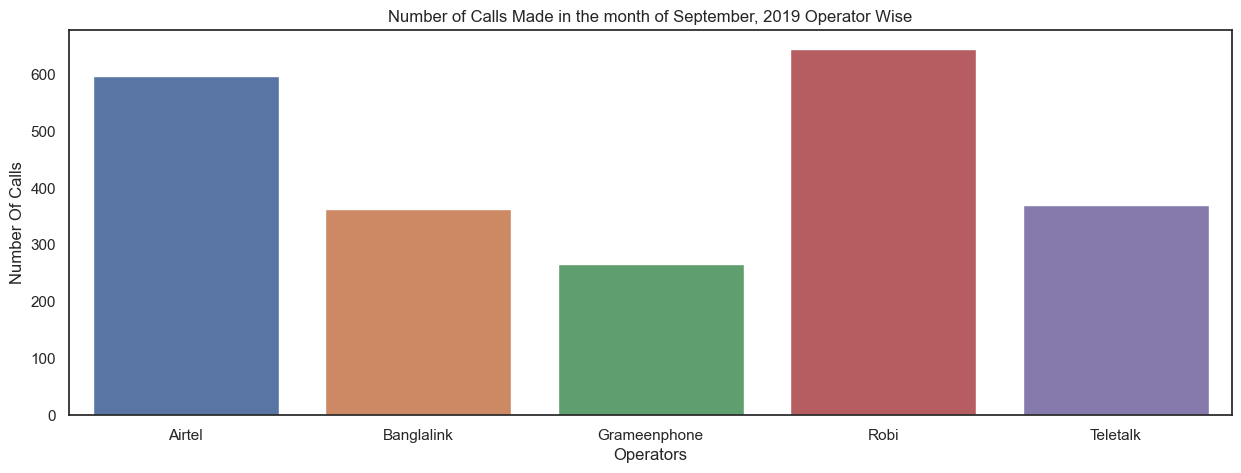

In [287]:
plt.figure(figsize=[15,5])
sns.set(style='white')
sns.barplot(x = df['Op_name'], y = df['Number Of Calls'], hue = df['Op_name'], legend=False)

#Labelling the axes
plt.xlabel('Operators')
plt.ylabel('Number Of Calls')
plt.title('Number of Calls Made in the month of September, 2019 Operator Wise')